In [1]:
import numpy 
import pandas as pd

# All auxiliary code is in ../src
import sys
sys.path.append("../src/")

from transformations.values import remove_from_columns
dataset = pd.read_csv('../dataset/cyclists.csv')


missing_weights = numpy.argwhere(dataset["weight"].isna()).squeeze()
missing_heigths = numpy.argwhere(dataset["height"].isna()).squeeze()
missing_birth_year = numpy.argwhere(dataset["birth_year"].isna()).squeeze()

In [2]:
dataset.isnull().sum()

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64

In [3]:
print(missing_weights)

[   0    6    9 ... 6128 6129 6131]


In [4]:
print(missing_heigths)

[   0    6    9 ... 6128 6129 6131]


In [5]:
print(missing_birth_year)

[   9  601  894 2408 2515 2536 3046 3551 4142 4384 4756 6072 6080]


In [6]:
dataset[dataset.isnull().any(axis=1)]

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
6,willy-moonen,Willy Moonen,1947.0,NaN,NaN,Belgium
9,scott-davies,Scott Davies,NaN,NaN,NaN,NaN
10,stian-remme,Stian Remme,1982.0,NaN,NaN,Norway
13,evgueny-anachkine,Evgueny Anachkine,1970.0,NaN,NaN,Russia
...,...,...,...,...,...,...
6124,henri-vandenabeele,Henri Vandenabeele,2000.0,NaN,181.0,Belgium
6127,hendrik-van-dyck,Hendrik Van Dyck,1974.0,NaN,NaN,Belgium
6128,francisco-jose-pacheco,Francisco José Pacheco,1982.0,NaN,NaN,Spain
6129,juan-jose-martinez-diaz,Juan José Martínez,1966.0,NaN,NaN,Spain


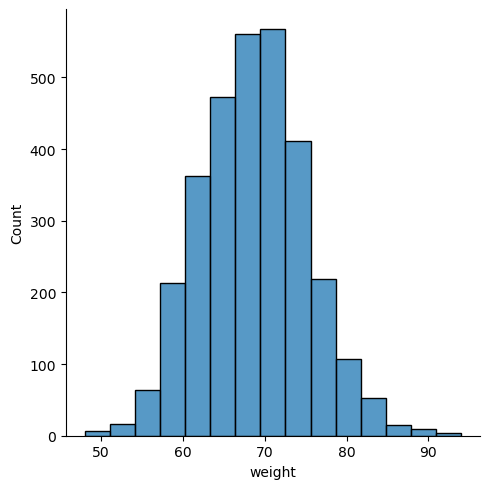

In [14]:
import seaborn
import matplotlib.pyplot as plt
seaborn.displot(dataset, 
                x="weight", 
                kind="hist",
                row_order="desc",
                bins=15)

(array([150., 160., 170., 180., 190., 200., 210.]),
 [Text(150.0, 0, '150'),
  Text(160.0, 0, '160'),
  Text(170.0, 0, '170'),
  Text(180.0, 0, '180'),
  Text(190.0, 0, '190'),
  Text(200.0, 0, '200'),
  Text(210.0, 0, '210')])

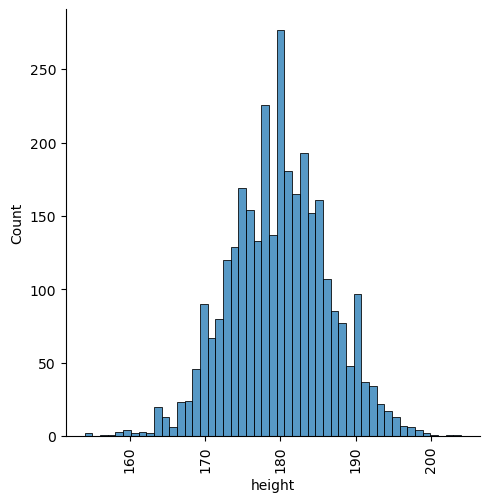

In [16]:
seaborn.displot(dataset, 
                x="height", 
                kind="hist",
                row_order="desc",
                bins=len(dataset['height'].unique()))
plt.xticks(rotation=90) #to rotate x-axis label by 90° --> read better

In [17]:
import numpy 
from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer(strategy="mean")

imputer.fit(dataset[["weight"]])

dataset["weight"] = imputer.transform(dataset[["weight"]]).squeeze()

In [21]:
dataset.isnull().sum()

_url              0
name              0
birth_year       13
weight            0
height         2991
nationality       1
dtype: int64

no more null weight values

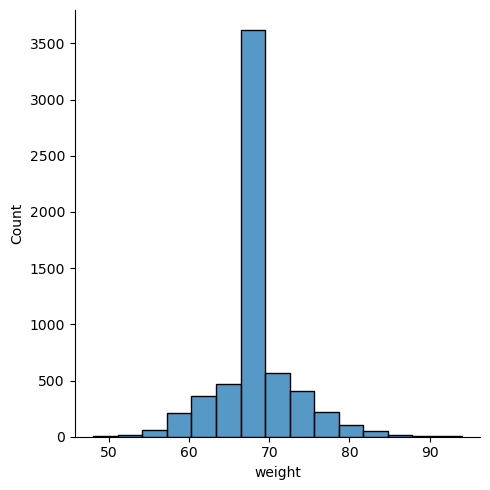

In [22]:
seaborn.displot(dataset, 
                x="weight", 
                kind="hist",
                row_order="desc",
                bins=15)

istogramma troppo piccato sulla media xk ho sostituito i valori mancanti con la media 

In [26]:
from dataunderstanding import correlations
from transformations import center_and_scale, drop_boolean

dataset = pd.read_csv('../dataset/cyclists.csv')
normalized_dataset, normalization_scalers_dataset = center_and_scale(dataset)
correlations = correlations(normalized_dataset)
correlations

,birth_year,weight,height,correlation_type
birth_year,1.000000,-0.063740,0.094976,kendall
weight,-0.063740,1.000000,0.539760,kendall
height,0.094976,0.539760,1.000000,kendall
birth_year,1.000000,-0.104242,0.154252,pearson
weight,-0.104242,1.000000,0.720732,pearson
height,0.154252,0.720732,1.000000,pearson
birth_year,1.000000,-0.091220,0.137001,spearman
weight,-0.091220,1.000000,0.705189,spearman
height,0.137001,0.705189,1.000000,spearman


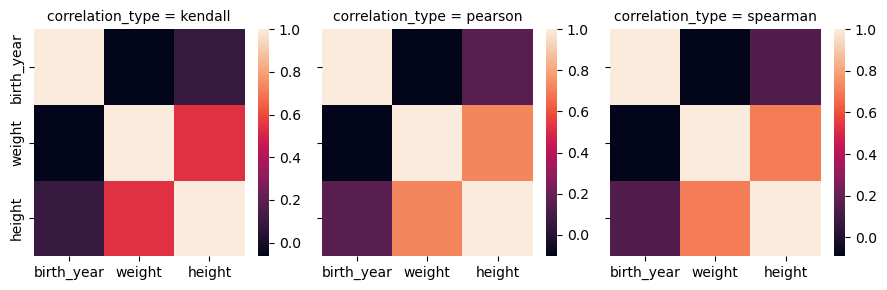

In [27]:
import seaborn

g = seaborn.FacetGrid(correlations, col="correlation_type")
g.map_dataframe(lambda data, color: seaborn.heatmap(data[data.columns[:-1]]))

Pearson correlation --> High Degree: Values between ±0.50 and ±1 suggest a strong correlation. 
--> strong linear correlation between height and weight (0.72 corr. Pearson) 
si possono ricavare pesi e altezze mancanti quando è noto almeno uno dei due 

In [30]:
missing_both_weights_and_heights = dataset[(dataset['height'].isna()) & (dataset['weight'].isna())].shape[0]
print(missing_both_weights_and_heights)

2984
